In [1]:
%gui qt5
# Note that this Magics command needs to be run in a cell
# before any of the Napari objects are instantiated 
#(before starting viewer) to ensure it has time to 
# finish executing before they are called (few seconds)

In [2]:
# Some magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
# Ignore warnings in notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Create a temporary python PATH to the module that we are using for the analysis
import sys
sys.path.insert(0, "/Users/Espenel/Desktop/Mini-Grant-Image-analysis/2019/Aparna/AparnaAnalysis/utils")

In [6]:
from guts_analysis import *

In [7]:
file = "/Users/Espenel/Desktop/Mini-Grant-Image-analysis/2019/Aparna/Data/2xfts_RD_4DFed_1DS_1.tif"

In [8]:
import napari
from skimage import io
import numpy as np

In [9]:
img = io.imread(file)

### We are going to select which channel to work with - Starting with the DAPI channel

In [10]:
DAPI_Ch = 0

We creating a max intensity projection of DAPI to select our ROI

In [11]:
mip_dapi = np.amax(img[:,DAPI_Ch,:,:], axis=0)

We are using napari to create a ROI:   
click `new shape layer`, then we use `add paths`
press `<esc>` when drawing is done. 

In [12]:
viewer = napari.view_image(mip_dapi)

In [13]:
DAPI_roi, bbox = create_mask.bounding_box(viewer, img)

In [14]:
viewer = napari.Viewer(ndisplay=2)
viewer.add_image(DAPI_roi, name="DAPI")

<Image layer 'DAPI' at 0x12df37048>

We create a binary mask of the guts and find the border

In [15]:
mask, border, back_sub = create_mask.mask_guts(file, DAPI_roi, size =20)

In [16]:
viewer.add_labels(mask, name = "mask")

<Labels layer 'mask' at 0x132d06a20>

In [17]:
viewer.add_labels(border, name = "border")

<Labels layer 'border' at 0x132d06630>

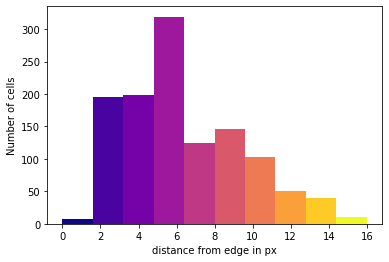

In [18]:
dist_mark = dist_edge.nucleus_vs_dist_guts(back_sub, border, plot=True)

In [19]:
viewer.add_image(dist_mark, colormap = 'plasma', blending = "additive")

<Image layer 'Image' at 0x12d576d30>

In [23]:
df = analysis.create_table(dist_mark, img, bbox, file, save= True)

In [24]:
df

,channel,Distance from edges,mean intensity,Normalized mean intensity,coord z,coord x,coord y
0,1.0,1.0,1080.121313,0.106963,23.00000,472.000000,247.00000
1,1.0,1.0,1479.184752,0.177012,27.00000,515.000000,300.00000
2,1.0,1.0,1176.356164,0.123855,29.60274,539.172211,232.60274
3,2.0,1.0,242.809683,0.193876,23.00000,472.000000,247.00000
4,2.0,1.0,351.490262,0.023178,27.00000,515.000000,300.00000
...,...,...,...,...,...,...,...
4231,4.0,16.0,444.084029,0.077606,17.00000,458.000000,451.00000
4232,4.0,16.0,326.348915,0.039629,19.00000,190.000000,432.00000
4233,4.0,16.0,410.742905,0.066851,20.00000,159.000000,428.00000
4234,4.0,16.0,437.977741,0.075636,20.00000,266.000000,310.00000
